In [47]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

import bemcs


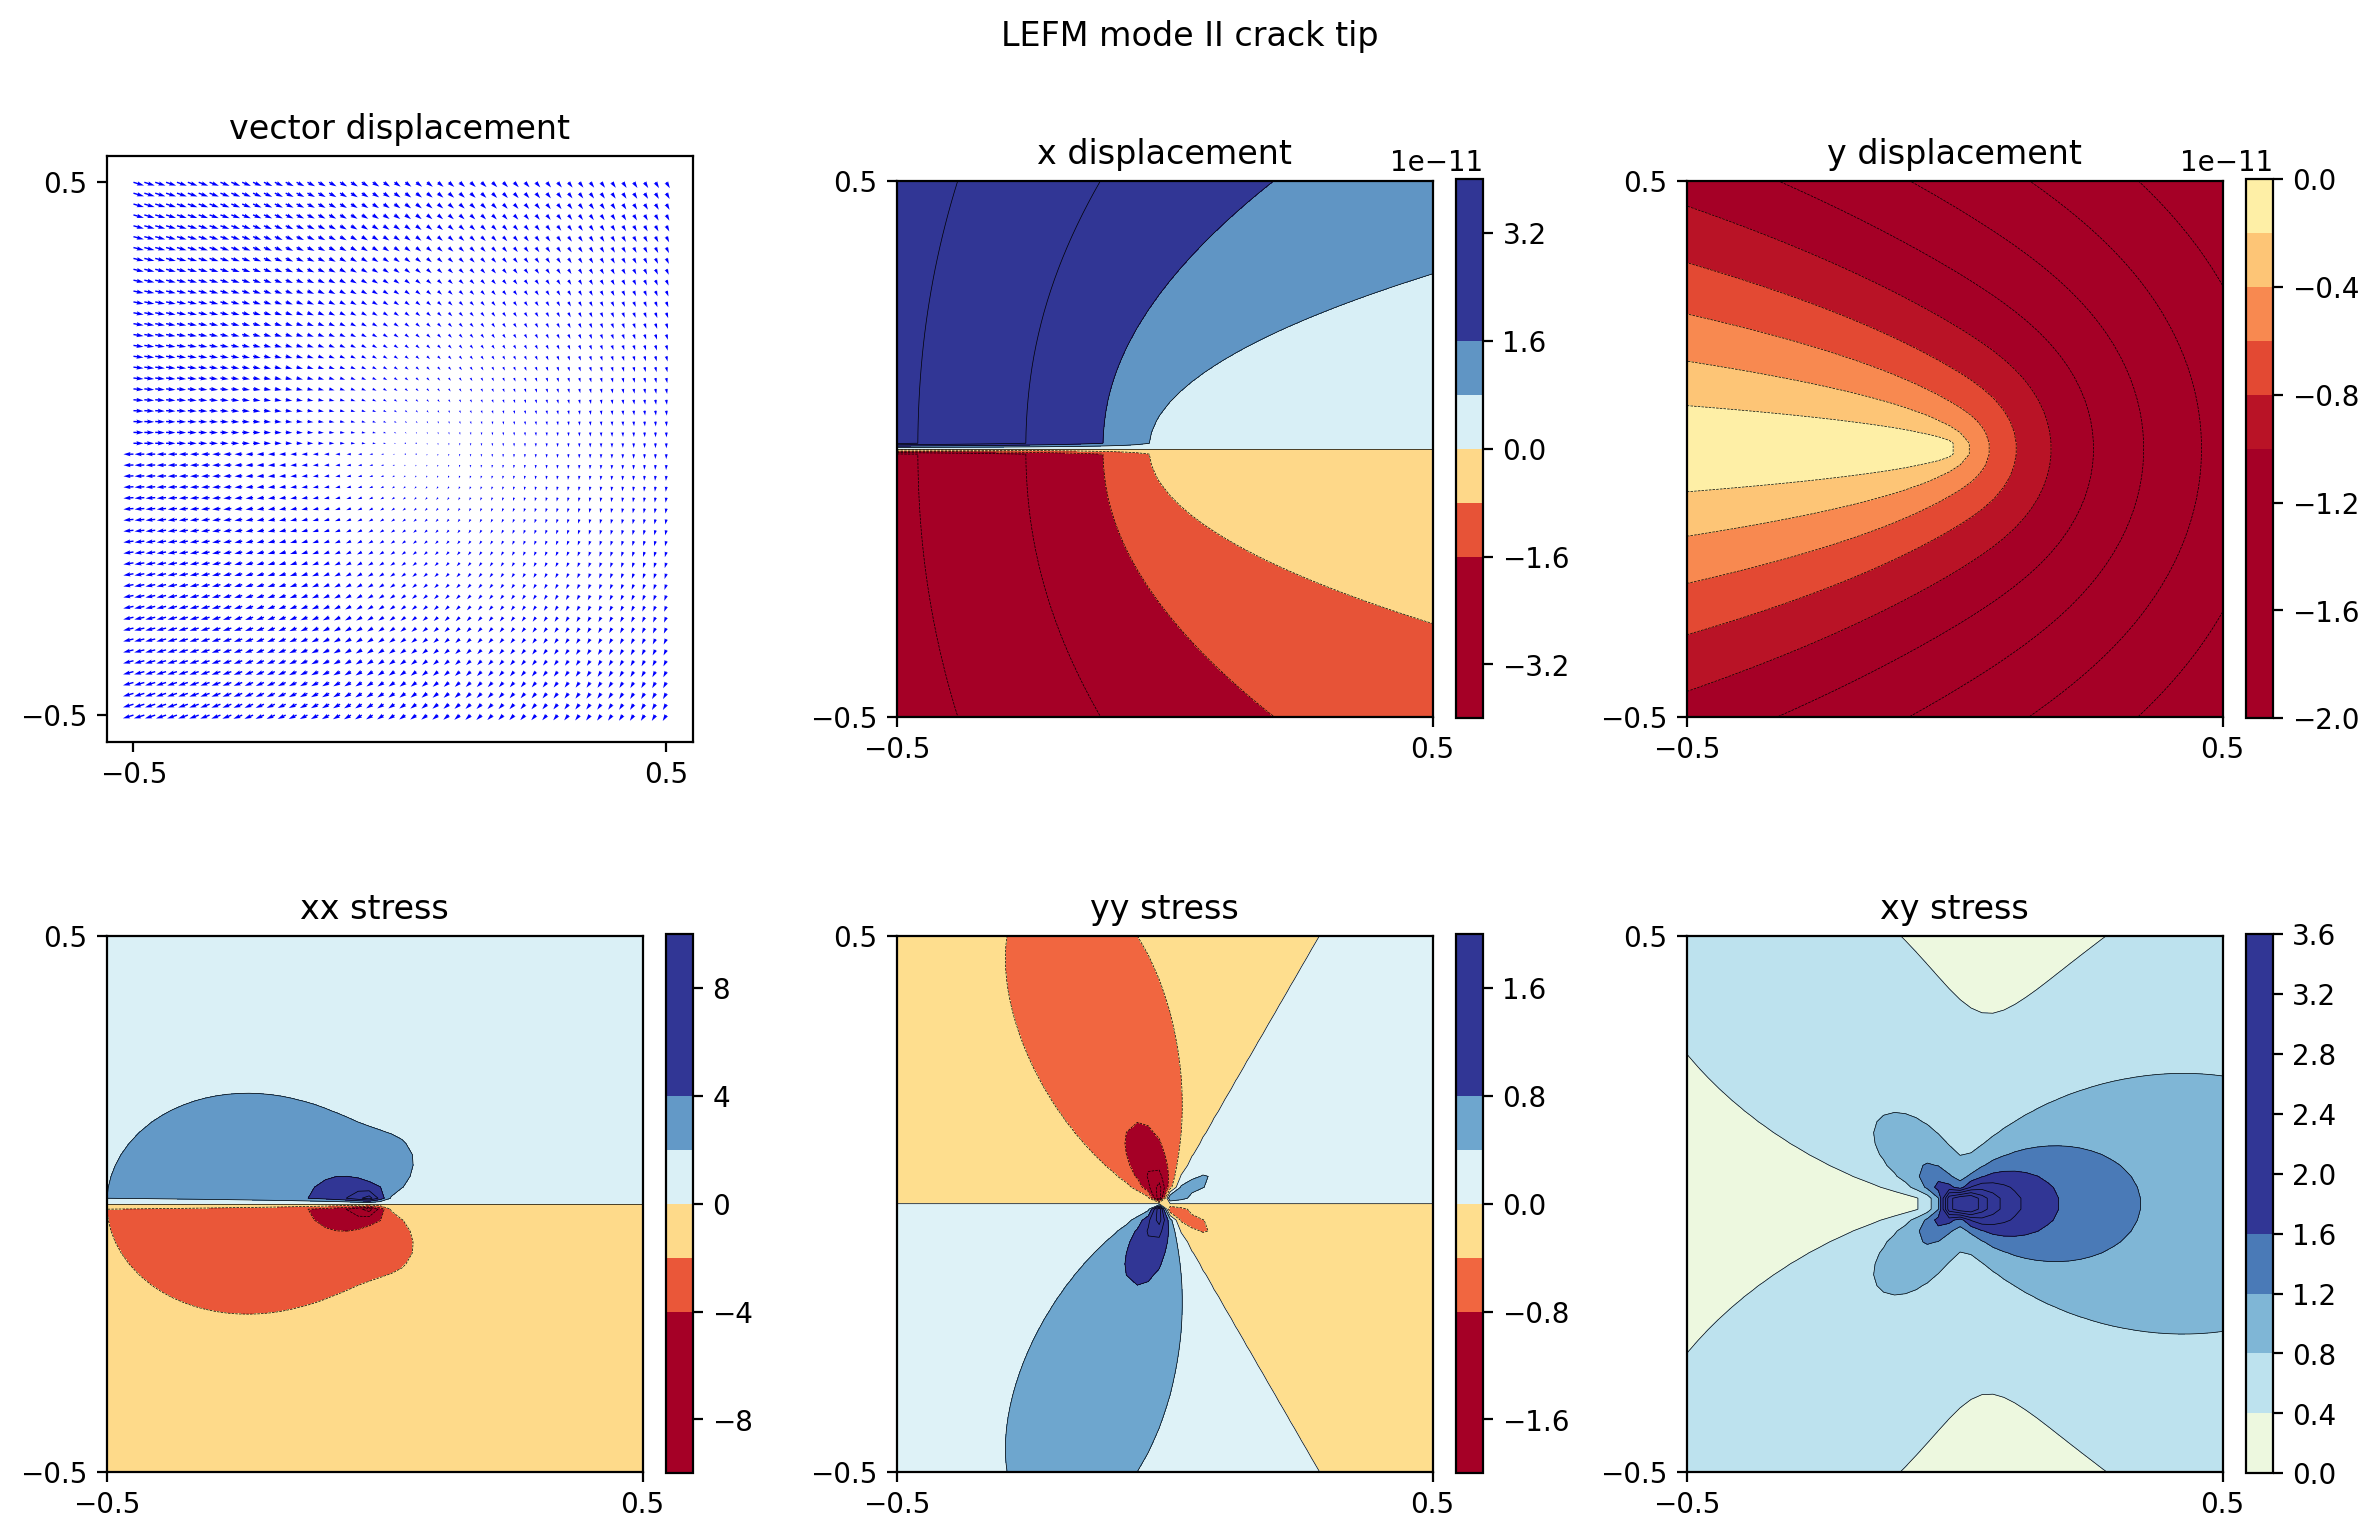

In [49]:
tau = 1.0
a = 1.0
nu = 0.25
mu = 3e10
K_II = tau * np.sqrt(np.pi * a)

n_pts = 50
x_vec = np.linspace(-0.5, 0.5, n_pts)
y_vec = np.linspace(-0.5, 0.5, n_pts)
x_mat, y_mat = np.meshgrid(x_vec, y_vec)
r_mat = np.sqrt(x_mat**2 + y_mat**2.0)
theta_mat = np.arctan2(y_mat, x_mat)
x = x_mat.flatten()
y = y_mat.flatten()
r = r_mat.flatten()
theta = theta_mat.flatten()

u_x = (
    K_II
    / mu
    * np.sqrt(r / (2 * np.pi))
    * (2 - 2 * nu * np.cos(theta / 2.0) ** 2.0)
    * np.sin(theta / 2.0)
)

u_y = (
    K_II
    / mu
    * np.sqrt(r / (2 * np.pi))
    * (-1 - 2 * nu * np.sin(theta / 2.0) ** 2.0)
    * np.cos(theta / 2.0)
)

sigma_xx = (
    K_II
    / np.sqrt(2 * np.pi * r)
    * np.sin(theta / 2.0)
    * (2 + np.cos(theta / 2.0) * np.cos(3.0 * theta / 2.0))
)

sigma_yy = (
    K_II
    / np.sqrt(2 * np.pi * r)
    * np.sin(theta / 2.0)
    * np.cos(theta / 2.0)
    * np.cos(3.0 * theta / 2.0)
)

sigma_xy = (
    K_II
    / np.sqrt(2 * np.pi * r)
    * np.cos(theta / 2.0)
    * (1 - np.sin(theta / 2.0) * np.sin(3.0 * theta / 2.0))
)

displacement_crack = np.vstack((u_x, u_y))
stress_crack = np.vstack((sigma_xx, sigma_yy, sigma_xy))

bemcs.plot_fields_no_elements(
    x_mat,
    y_mat,
    displacement_crack,
    stress_crack,
    "LEFM mode II crack tip",
)


In [50]:
stress_crack.shape


(3, 2500)

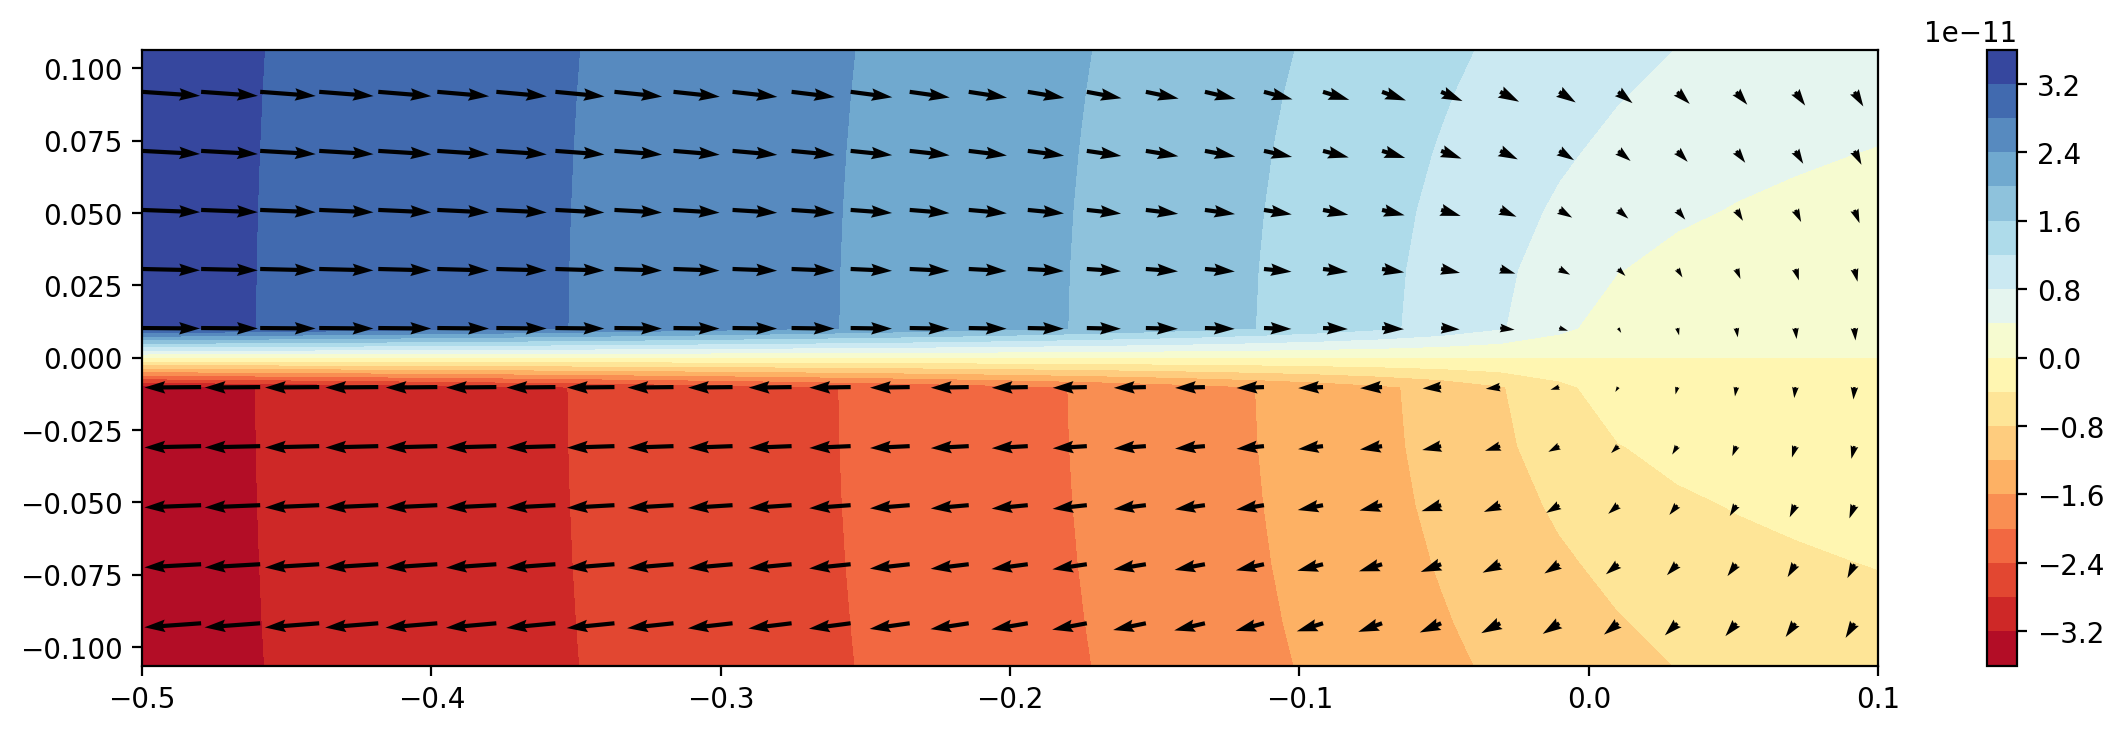

In [53]:
plt.figure(figsize=(14, 4))
toplot = displacement_crack[0,:]
plt.contourf(x_mat.reshape(n_pts, n_pts), y_mat.reshape(n_pts, n_pts), toplot.reshape(n_pts, n_pts),20,cmap='RdYlBu')
plt.colorbar()
plt.quiver(
    x_mat.flatten(),
    y_mat.flatten(),
    displacement_crack[0, :],
    displacement_crack[1, :],
    units="width",
    color="k",
    scale=1e-9,
)
plt.axis("equal")
plt.xlim([-0.5, 0.1])
plt.ylim([-0.1, 0.1])
plt.show()